In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def center_fuse(df):
    
    
    return df

In [ ]:
components = pd.read_csv("Component Location Data - Sheet1.csv")
if 1 == True: print("hello")


In [ ]:
#Fuselage will be placed at COM
fuselageIndex = False == ( components['Component Name'] == 'Fuselage' )

In [ ]:
xIndex = False == np.isnan(components['X-Position from Datum [m]'])

xCOM = np.sum(components['Mass [g]'][fuselageIndex & xIndex] * components['X-Position from Datum [m]'][fuselageIndex & xIndex] )/ np.sum(components['Mass [g]'][fuselageIndex & xIndex])
xCOM

In [ ]:
yIndex = False == np.isnan(components['Y-Position from Datum [m]'])

yCOM = np.sum(components['Mass [g]'][yIndex] * components['Y-Position from Datum [m]'][yIndex] )/ np.sum(components['Mass [g]'][yIndex])
yCOM

In [6]:
#put fuselage x pos at COM
components['X-Position from Datum [m]'][fuselageIndex == False] = xCOM

/var/folders/4s/3g9d5x7158j00khlj3w5wxxh0000gn/T/ipykernel_95898/2777252540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  components['X-Position from Datum [m]'][fuselageIndex == False] = xCOM


In [7]:
#components[components['Component Name'] != 'Fuselage']['Mass [g]'].sum()

In [8]:
components['X-Position from COM [m]'] = components['X-Position from Datum [m]'] - xCOM
components['Y-Position from COM [m]'] = components['Y-Position from Datum [m]'] - yCOM
components

,Component Name,Mass [g],X-Position from Datum [m],Y-Position from Datum [m],X-Position from COM [m],Y-Position from COM [m]
0,Wings,1200.00,-0.042700,0.01000,-0.166714,0.05652
1,Tail,45.78,1.913000,0.06265,1.788986,0.10917
2,Fuselage,2000.00,0.124014,-0.20000,0.000000,-0.15348
3,Wing Spar,200.00,-0.083200,0.03685,-0.207214,0.08337
4,Tail Spar,195.00,1.830000,0.01900,1.705986,0.06552
5,Fuse to Tail Spar,155.00,0.977000,0.01891,0.852986,0.06543
6,Battery,1600.00,-0.030000,0.03000,-0.154014,0.07652
7,Front Lift Propellers,45.00,-0.500000,0.00000,-0.624014,0.04652
8,Back lift Propellers,45.00,0.800000,0.00000,0.675986,0.04652
9,Thrust Propeller,45.00,-0.190000,-0.01000,-0.314014,0.03652


In [9]:
fuselageData = pd.DataFrame({'Cross Section Area [m^2]': [0.04], 'Drag Coefficient': [0.295]})

In [10]:
airDensity = 1.293 #kg/m^3
velocity = np.linspace(0,21.336,1000)

In [11]:
dragForce = -0.5 * airDensity * fuselageData['Cross Section Area [m^2]'][0] * fuselageData['Drag Coefficient'][0] * velocity**2

In [12]:
wingData = pd.DataFrame({'Cross Section Area [m^2]': [0.592], 'Lift Coefficient': [0.95383], 'Distance from Datum [m]': [0.025]})
wingLift = 0.5 * airDensity * wingData['Cross Section Area [m^2]'][0] * wingData['Lift Coefficient'][0] * velocity**2

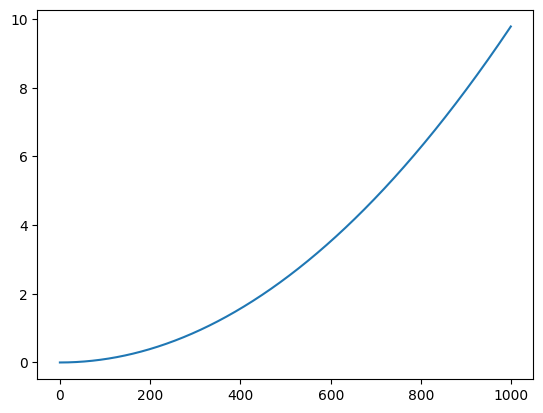

In [24]:
tailData = pd.DataFrame({'Cross Section Area [m^2]': [0.172], 'Lift Coefficient': [0.19329], 'Distance from Datum [m]': [0.939]})
tailLift = 0.5 * airDensity * tailData['Cross Section Area [m^2]'][0] * tailData['Lift Coefficient'][0] * velocity**2
plt.plot(tailLift)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


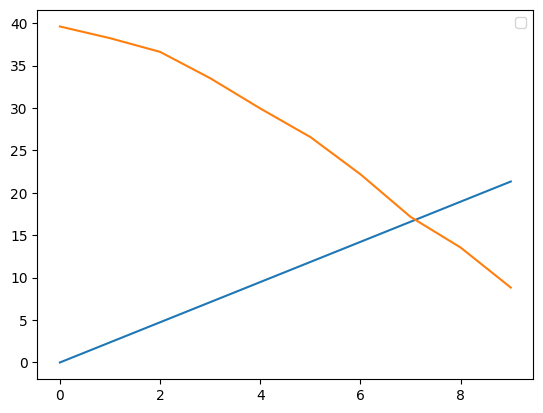

In [36]:
thrustData = pd.read_csv("thrustData.csv")
plt.close()
plt.plot(thrustData)
plt.legend()

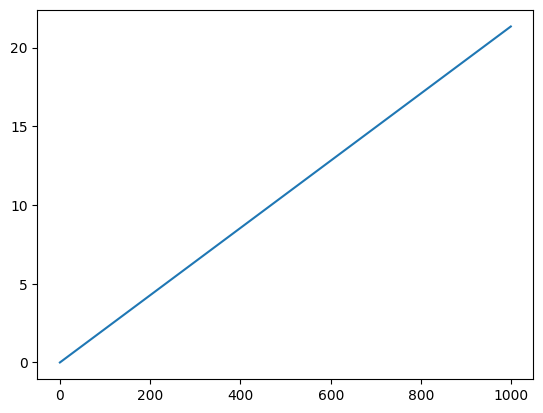

In [33]:
plt.plot(velocity)
plt.show()
plt.close()

In [16]:
#slope of thrust vs velocity curve at each point
thrustSlope = (thrustData['Thrust [N]'][1:].reset_index(drop=True) - thrustData['Thrust [N]'][:-1]) / (thrustData['Vel [m/s]'][1:].reset_index(drop=True) - thrustData['Vel [m/s]'][:-1])


thrustForce = np.linspace(0,1,1000) #to get right length of array

#thrust force at each point
thrustForce[velocity >= thrustData['Vel [m/s]'][0]] = thrustData['Thrust [N]'][0] + thrustSlope[0] * (velocity[velocity >= thrustData['Vel [m/s]'][0]])

for i in range(1, len(thrustData['Vel [m/s]'])-1):
    thrustForce[velocity >= thrustData['Vel [m/s]'][i]] = thrustData['Thrust [N]'][i] + thrustSlope[i] * (velocity[velocity >= thrustData['Vel [m/s]'][i]] - thrustData['Vel [m/s]'][i])

thrustForce    



array([39.61654745, 39.60413186, 39.59171626, 39.57930067, 39.56688508,
       39.55446948, 39.54205389, 39.5296383 , 39.51722271, 39.50480711,
       39.49239152, 39.47997593, 39.46756033, 39.45514474, 39.44272915,
       39.43031355, 39.41789796, 39.40548237, 39.39306677, 39.38065118,
       39.36823559, 39.35582   , 39.3434044 , 39.33098881, 39.31857322,
       39.30615762, 39.29374203, 39.28132644, 39.26891084, 39.25649525,
       39.24407966, 39.23166407, 39.21924847, 39.20683288, 39.19441729,
       39.18200169, 39.1695861 , 39.15717051, 39.14475491, 39.13233932,
       39.11992373, 39.10750813, 39.09509254, 39.08267695, 39.07026136,
       39.05784576, 39.04543017, 39.03301458, 39.02059898, 39.00818339,
       38.9957678 , 38.9833522 , 38.97093661, 38.95852102, 38.94610542,
       38.93368983, 38.92127424, 38.90885865, 38.89644305, 38.88402746,
       38.87161187, 38.85919627, 38.84678068, 38.83436509, 38.82194949,
       38.8095339 , 38.79711831, 38.78470271, 38.77228712, 38.75

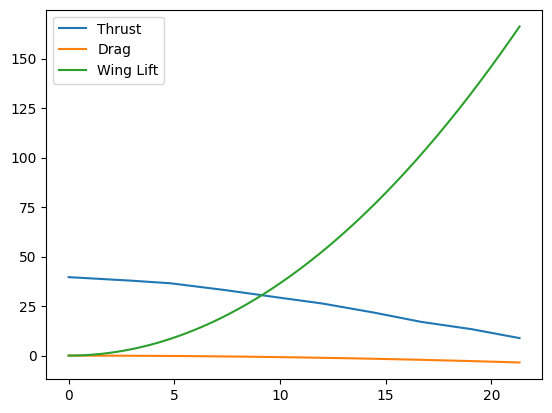

In [17]:
plt.plot(velocity, thrustForce)
plt.plot(velocity, dragForce)
plt.plot(velocity, wingLift)
plt.legend(['Thrust', 'Drag', 'Wing Lift'])

In [82]:
#Calculate moments about COM from each force
#Thrust moment
thrustMoment = thrustForce * components['Y-Position from COM [m]' ][components['Component Name'] == 'Thrust Motor'].reset_index(drop=True)[0]


#Drag moment
dragMoment = dragForce * components['Y-Position from COM [m]' ][components['Component Name'] == 'Fuselage'].reset_index(drop=True)[0]

#Wing lift moment
wingCOPDatum = 0.018 #m
wingMoment = wingLift * (wingCOPDatum - xCOM)

#Tail lift moment
tailCOPDatum = 1.852
tailMoment = tailLift * components['X-Position from COM [m]' ][components['Component Name'] == 'Tail'].reset_index(drop=True)[0]
tailMoment = 0
totalMoment = thrustMoment + dragMoment + wingMoment + tailMoment

-10.356778404791449

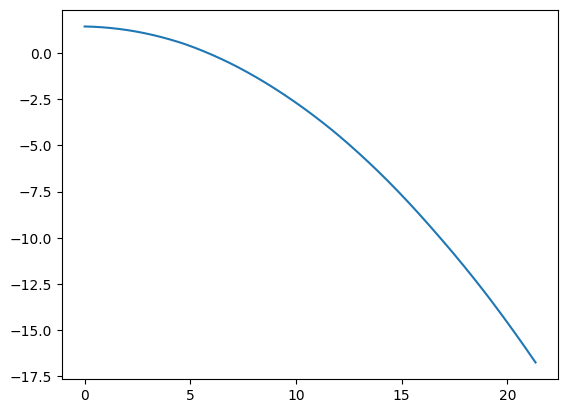

In [86]:
plt.plot(velocity, totalMoment)
velocity[800]
totalMoment[800]


In [93]:
components['X-Contibution'] = components['Mass [g]'] * components['X-Position from COM [m]'] * 9.81 * 10 ** -3
components['Y-Contibution'] = components['Mass [g]'] * components['Y-Position from COM [m]'] * 9.81 * 10 ** -3
components


,Component Name,Mass [g],X-Position from Datum [m],Y-Position from Datum [m],X-Position from COM [m],Y-Position from COM [m],X-Contibution,Y-Contibution
0,Wings,1200.00,-0.042700,0.01000,-0.166714,0.05652,-1.962560,0.665354
1,Tail,45.78,1.913000,0.06265,1.788986,0.10917,0.803437,0.049028
2,Fuselage,2000.00,0.124014,-0.20000,0.000000,-0.15348,0.000000,-3.011276
3,Wing Spar,200.00,-0.083200,0.03685,-0.207214,0.08337,-0.406554,0.163572
4,Tail Spar,195.00,1.830000,0.01900,1.705986,0.06552,3.263465,0.125337
5,Fuse to Tail Spar,155.00,0.977000,0.01891,0.852986,0.06543,1.297007,0.099490
6,Battery,1600.00,-0.030000,0.03000,-0.154014,0.07652,-2.417408,1.201059
7,Front Lift Propellers,45.00,-0.500000,0.00000,-0.624014,0.04652,-0.275471,0.020536
8,Back lift Propellers,45.00,0.800000,0.00000,0.675986,0.04652,0.298414,0.020536
9,Thrust Propeller,45.00,-0.190000,-0.01000,-0.314014,0.03652,-0.138622,0.016122
